In [162]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso
from sklearn.metrics import f1_score

# Experiment 1
Assumptions:
- Population 50% blue, 50% yellow 
- Features: work experience, school
- True employabilty is determined by the sum of the features
- Two groups have same normal true employability distribution
- Yellow group has skew of 1 towards experience, Blue group has skew of 1 towards school
- group_size = 5000
- id range below group size is blue, id range above group size is yellow

- employ people with skill levels above 1
- 

### Create population with assumptions

In [163]:
group_size = 5000
skew = 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a7bf575f8>,
      dtype=object)

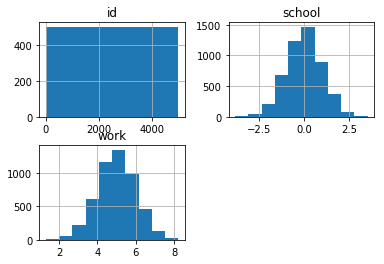

In [164]:
#blue group
id = [x for x in range(group_size)]

work = np.random.normal(loc=skew, size=group_size)
school = np.random.normal(loc=0, size=group_size)

blue_group = pd.DataFrame({'id': id, 'work': work, 'school': school})
blue_group.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a81508b70>,
      dtype=object)

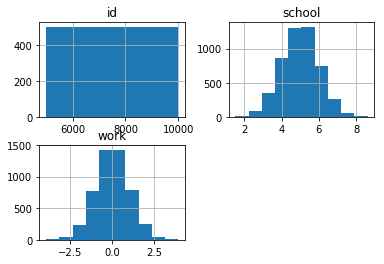

In [165]:
#yellow group
id = [x for x in range(group_size, 2*group_size)]

work = np.random.normal(loc=0, size=group_size)
school = np.random.normal(loc=skew, size=group_size)

yellow_group = pd.DataFrame({'id': id, 'work': work, 'school': school})
yellow_group.hist()

In [199]:
# checking employability     work + school
fuzz_min = 70
fuzz_max = 130

yellow_group['empl'] = (yellow_group['school'] + yellow_group['work']) * np.random.randint(fuzz_min, fuzz_max, size=len(yellow_group))
blue_group['empl'] = (blue_group['school'] + blue_group['work']) * np.random.randint(fuzz_min, fuzz_max, size=len(blue_group))

print(yellow_group['empl'].mean())
print(blue_group['empl'].mean())

499.95064394090764
497.8363781106001


In [200]:
# concat and shuffling rows
less_blue_group = blue_group[:1000]
df = pd.concat([less_blue_group, yellow_group], ignore_index=True).sample(frac=1).reset_index(drop=True)

In [201]:
train, test = train_test_split(df, test_size=0.2)

train_x = train.drop('empl', axis='columns')
train_y = train['empl']
test_x = test.drop('empl', axis='columns')
test_y = test['empl']

In [202]:
lm = Lasso()
lm.fit(train_x, train_y)

print(lm.score(test_x, test_y))

0.7230901002740917


In [203]:
#per group accuracy
blue_test = test[test['id'] < group_size]
blue_x = blue_group.drop('empl', axis='columns')
blue_y = blue_group['empl']
print(lm.score(blue_x, blue_y))

yellow_test = test[test['id'] >= group_size]
yellow_x = yellow_group.drop('empl', axis='columns')
yellow_y = yellow_group['empl']
print(lm.score(yellow_x, yellow_y))

0.7112834929557379
0.7106760085831223
